In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ten_runs = pd.read_csv('../results/FP_Oracle_auto_DR_others_auto_Truth_100_experiments/net_utility_100_iters_10_runs.csv')
ten_runs.head()

,Run,Agent,Iteration,Net Utility
0,0,Auto da corsa Scem 2,0,-49.011413
1,0,Auto da corsa Scem 2,1,-32.334762
2,0,Auto da corsa Scem 2,2,-32.690504
3,0,Auto da corsa Scem 2,3,-38.552684
4,0,Auto da corsa Scem 2,4,-29.625052


In [5]:
ten_runs['Run'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
prev_runs_dir = '../results/prev_exp/'
prev_runs = pd.concat(
    [
        pd.read_csv(f'{prev_runs_dir}{file_name}') 
        for file_name in os.listdir(prev_runs_dir)
    ]
)
prev_runs.head()

,Run,Agent,Iteration,Net Utility
0,7,Auto da corsa Scem 2,0,-40.134479
1,7,Auto da corsa Scem 2,1,-51.737033
2,7,Auto da corsa Scem 2,2,-27.124719
3,7,Auto da corsa Scem 2,3,-70.623186
4,7,Auto da corsa Scem 2,4,-40.213896


In [6]:
prev_runs['Run'].unique()

array([ 7, 21,  0, 14, 15])

In [8]:
prev_runs.loc[prev_runs['Run'] == 0, 'Run'] = 10
prev_runs.loc[prev_runs['Run'] == 7, 'Run'] = 11
prev_runs.loc[prev_runs['Run'] == 14, 'Run'] = 12
prev_runs.loc[prev_runs['Run'] == 15, 'Run'] = 13
prev_runs.loc[prev_runs['Run'] == 21, 'Run'] = 14

In [9]:
# Concatenate the two dataframes
all_runs = pd.concat([ten_runs, prev_runs])

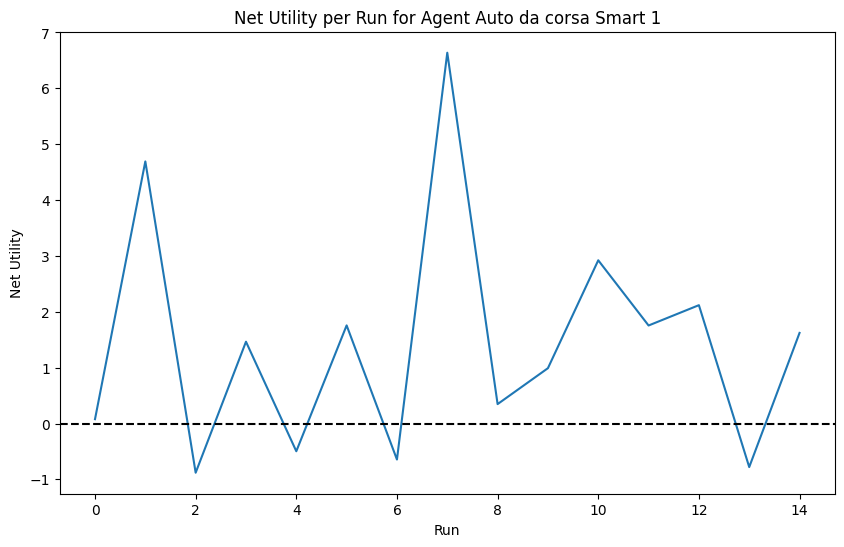

In [10]:
agent = 'Auto da corsa Smart 1'
mean_per_run = all_runs \
    .groupby(by=['Agent', 'Run']) \
    .mean() \
    .reset_index() \
    .drop(columns='Iteration')
agent_data_mean = mean_per_run[mean_per_run['Agent'] == agent]
plt.figure(figsize=(10, 6))
plt.plot(agent_data_mean['Run'], agent_data_mean['Net Utility'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Run')
plt.ylabel('Net Utility')
plt.title('Net Utility per Run for Agent ' + agent)
plt.show()

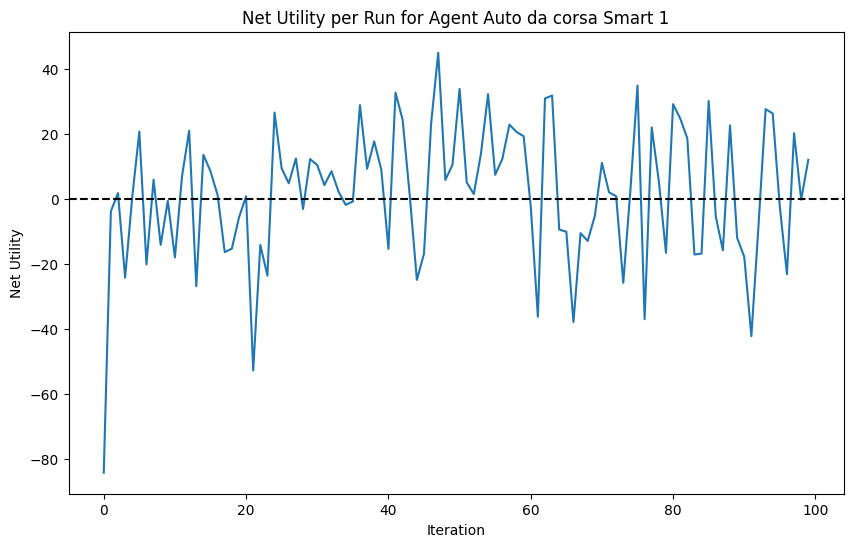

In [6]:
agent = 'Auto da corsa Smart 1'
mean_per_iter = all_runs \
    .groupby(by=['Agent', 'Iteration']) \
    .mean() \
    .reset_index()
agent_data_mean = mean_per_iter[mean_per_iter['Agent'] == agent]
plt.figure(figsize=(10, 6))
plt.plot(agent_data_mean['Iteration'], agent_data_mean['Net Utility'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Net Utility')
plt.title('Net Utility per Run for Agent ' + agent)
plt.show()

In [11]:
# Save concatenated dataframe
all_runs.to_csv('../results/prev_exp/net_utility_100_iters_15_runs.csv', index=False)

In [4]:
all_runs = pd.read_csv('../results/prev_exp/net_utility_100_iters_15_runs.csv')

In [20]:
last_run = all_runs['Run'].max()
last_run

14

In [21]:
prev_runs_dir = '../results/other_prev_exp/'
prev_runs = pd.concat(
    [
        pd.read_csv(f'{prev_runs_dir}{file_name}')
        for file_name in os.listdir(prev_runs_dir)
    ]
)
for i, curr_run in enumerate(prev_runs['Run'].unique()):
    prev_runs.loc[prev_runs['Run'] == curr_run, 'Run'] = last_run + i + 1

In [22]:
# Concatenate the two dataframes
all_runs = pd.concat([all_runs, prev_runs[prev_runs['Run']==15]])

In [27]:
all_runs.to_csv('../results/prev_exp/net_utility_100_iters_16_runs.csv', index=False)

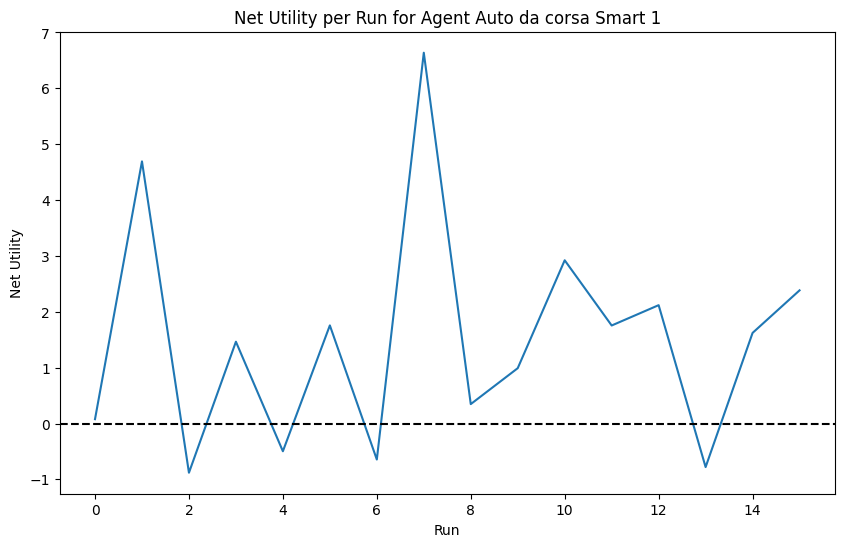

In [23]:
agent = 'Auto da corsa Smart 1'
mean_per_run = all_runs \
    .groupby(by=['Agent', 'Run']) \
    .mean() \
    .reset_index() \
    .drop(columns='Iteration')
agent_data_mean = mean_per_run[mean_per_run['Agent'] == agent]
plt.figure(figsize=(10, 6))
plt.plot(agent_data_mean['Run'], agent_data_mean['Net Utility'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Run')
plt.ylabel('Net Utility')
plt.title('Net Utility per Run for Agent ' + agent)
plt.show()

In [25]:
agents = all_runs['Agent'].unique()
agents

array(['Auto da corsa Scem 2', 'Auto da corsa Scem 3',
       'Auto da corsa Scem 4', 'Auto da corsa Scem 5',
       'Auto da corsa Smart 1'], dtype=object)

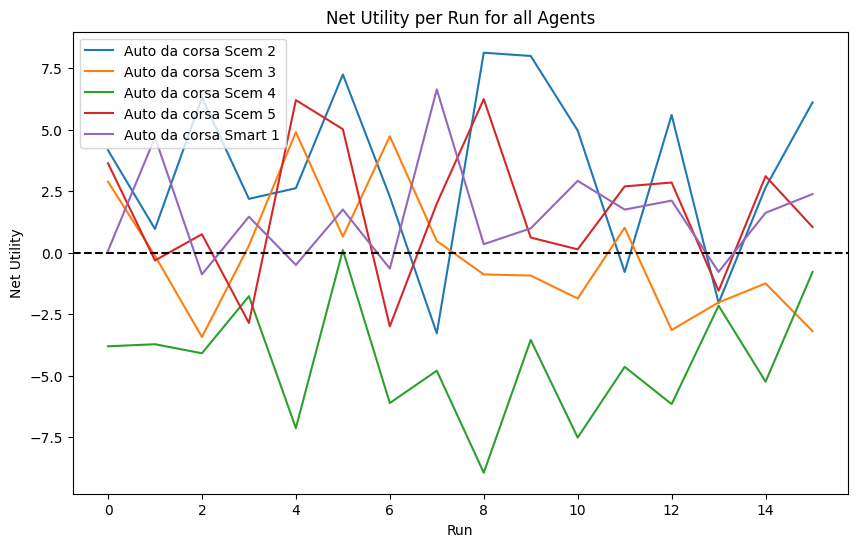

In [26]:
plt.figure(figsize=(10, 6))
for agent in agents:
    agent_data_mean = mean_per_run[mean_per_run['Agent'] == agent]
    plt.plot(agent_data_mean['Run'], agent_data_mean['Net Utility'], label=agent)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Run')
plt.ylabel('Net Utility')
plt.title('Net Utility per Run for all Agents')
plt.legend(loc='upper left')
plt.show()